<a href="https://colab.research.google.com/github/findQin/ColabCode/blob/master/mynlpLearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# vocab_size: 词汇表大小，要保存的词的数量，基于词频
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000 

In [4]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
  -O /tmp/sarcasm.json

--2020-06-22 00:41:24--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2020-06-22 00:41:25 (102 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [8]:
with open("/tmp/sarcasm.json", 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [43]:
sentences[:3]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild"]

In [44]:
labels[:3]

[0, 0, 1]

In [9]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [45]:
print(training_padded[:1])

[[ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [15]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [24]:
num_epochs = 30
# verbose: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Note that the progress bar is not particularly useful when logged to a file, so verbose=2 is recommended when not running interactively
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)


Epoch 1/30
625/625 - 2s - loss: 0.6655 - accuracy: 0.5782 - val_loss: 0.5901 - val_accuracy: 0.7356
Epoch 2/30
625/625 - 2s - loss: 0.4452 - accuracy: 0.8263 - val_loss: 0.3956 - val_accuracy: 0.8314
Epoch 3/30
625/625 - 2s - loss: 0.3181 - accuracy: 0.8733 - val_loss: 0.3572 - val_accuracy: 0.8502
Epoch 4/30
625/625 - 2s - loss: 0.2641 - accuracy: 0.8978 - val_loss: 0.3468 - val_accuracy: 0.8550
Epoch 5/30
625/625 - 2s - loss: 0.2268 - accuracy: 0.9119 - val_loss: 0.3619 - val_accuracy: 0.8419
Epoch 6/30
625/625 - 2s - loss: 0.1978 - accuracy: 0.9241 - val_loss: 0.3514 - val_accuracy: 0.8541
Epoch 7/30
625/625 - 2s - loss: 0.1758 - accuracy: 0.9330 - val_loss: 0.3663 - val_accuracy: 0.8535
Epoch 8/30
625/625 - 2s - loss: 0.1575 - accuracy: 0.9417 - val_loss: 0.3790 - val_accuracy: 0.8538
Epoch 9/30
625/625 - 2s - loss: 0.1415 - accuracy: 0.9475 - val_loss: 0.3966 - val_accuracy: 0.8514
Epoch 10/30
625/625 - 2s - loss: 0.1277 - accuracy: 0.9549 - val_loss: 0.4180 - val_accuracy: 0.8514

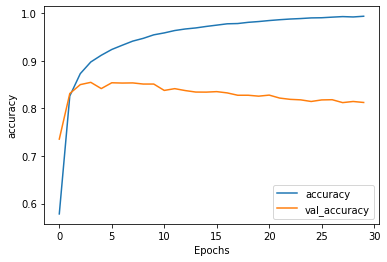

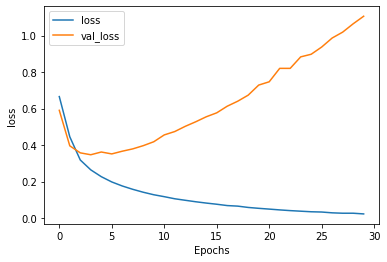

In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [27]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

In [28]:
# 反转后的词汇表 {1:'<OOV>', 2:'to',...}
reverse_word_index[1]

'<OOV>'

In [29]:
reverse_word_index[2]

'to'

In [31]:
def decode_sentence(text):
  # get(i, '?') 指定的键值不存在时，用？代替
  return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_sentence(training_padded[0])

"former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?"

In [33]:
len(training_padded[0])

100

In [32]:
sentences[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [38]:
new_sentences = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequence = tokenizer.texts_to_sequences(new_sentences)
padded = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [39]:
print(sequence)

[[1, 890, 2, 891, 1, 5, 4, 2565, 380, 22, 178], [249, 3, 1, 247, 3385, 2933, 20, 1551, 259]]


In [40]:
print(padded)

[[   1  890    2  891    1    5    4 2565  380   22  178    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 249    3    1  247 3385 2933   20 1551  259    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0

In [41]:
# 预测第一个句子的值接近1，第二个句子接近0
print(model.predict(padded))

[[9.7212243e-01]
 [3.7886693e-06]]
